In [ ]:
library(tidyverse)
library(dplyr)

In [ ]:
data = read.csv('4.33_data.csv') #this dataset contains all the reviews with their respective sentiment scores

In [ ]:
tail(data)

,X,Unnamed..0,title,set_id,date,content,rating,num_pieces,manufacturer_recommended.age,release_date,date_first_available,translated_content,review,compound,neg,neu,pos,language
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5117,5766,12123,👍👍👍carinissimo Lego per gli appassionati dei Minions👍👍👍,75582,Reviewed in Italy on 21 June 2024,"lego carinissimo a tema minions, simpatico e divertente.arriva a casa nella classica scatola lego, robusta e colorata.all'interno della confezione ho trovato:-8 bustine in plastica trasparente che contengono i lego;-2 manuali con le istruzioni di montaggio;-un foglietto di adesivi per completare le costruzioni.i manuali sono due e viene molto più semplice eseguire le costruzioni perchè in un manuale trovo la spiegazione per fare la base del gioco e nell'altro trovo le istruzioni per costruire i personaggi.come al solito le spiegazioni lego spiegano passo passo ogni singolo passaggio con immagini chiare e comprensibilissime.e' anche possibile scaricare le istruzioni digitali per seguire il montaggio sul cellulare o su un tablet ed avere piccole animazioni in 3d.questo set è ispirato alla serie cattivissimo me 4 e rappresenta gru e ben 5 minions tutti diversi posizionati su una basetta che una volta montata è possibile far muovere leggermente per creare una piccola giostrina rotante.il lego è composto da 839 pezzi ed è indicato per ragazzini a partire dai 9 anni di età perchè l'esecuzione non è proprio semplicissima ed i pezzi sono molto piccoli.a montarlo si impiega un pomeriggio intero e i minions sono personalizzabili con una serie di accessori come ad esempio una chitarrina, le maracas e l'immancabile banana.finito di montare ci si gioca per un pochino ma più che altro è un set che per risultare più divertente ha bisogno di altri set per creare un'ambientazione più grande e avventure diverse.il set è sicuramente originale, perfetto per i fan del film e dei minions e la qualità è indiscussa per cui lo consiglio serenamente, è carinissimo.",5,876,‎3 years and up,‎30 April 2024,21 April 2024,"Very cute minions-themed lego, cute and fun. It arrives at home in the classic lego box, sturdy and colorful. Inside the package I found: - 8 transparent plastic bags containing the lego; - 2 manuals with assembly instructions; - a sheet of stickers to complete the constructions. There are two manuals and it is much easier to carry out the constructions because in one manual I find the explanation to make the base of the game and in the other I find the instructions to build the characters. As usual, the lego explanations explain every single step step by step with clear and very understandable images. It is also possible to download the digital instructions to follow the assembly on your cell phone or tablet and have small 3D animations. This set is inspired by the series Despicable Me 4 and features Gru and 5 different minions positioned on a base that once assembled can be moved slightly to create a small rotating carousel. The lego is made up of 839 pieces and is suitable for children aged 9 and up because the execution is not exactly simple and the pieces are very small. It takes a whole afternoon to assemble and the minions can be customized with a series of accessories such as a little guitar, maracas and the inevitable banana. Once assembled, you can play with it for a little while but more than anything it is a set that to be more fun needs other sets to create a larger setting and different adventures. The set is definitely original, perfect for fans of the film and the minions and the quality is undisputed so I recommend it without hesitation, it is very cute.","Very cute minions-themed lego, cute and fun. It arrives at home in the classic lego box, sturdy and colorful. Inside the package I found: - 8 transparent plastic bags containing the lego; - 2 manuals with assembly instructions; - a sheet of stickers to complete the constructions.

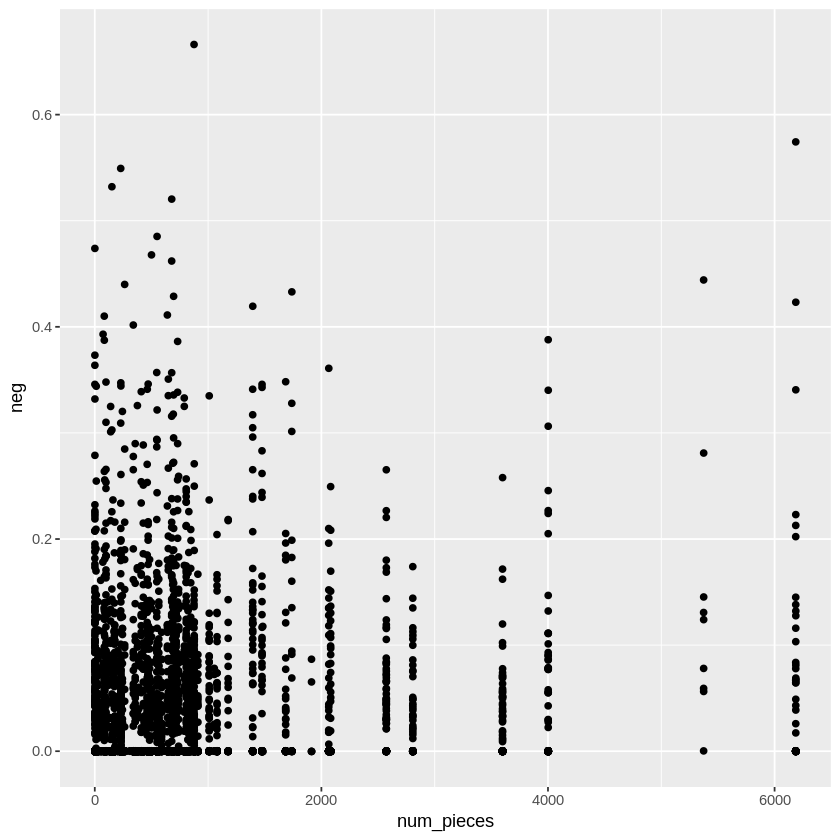

In [ ]:
ggplot(data, aes(num_pieces, neg)) + geom_jitter() #no relationships between piece count and ratings.

Are there any countries that are more rude in reviews?

In [ ]:
#remove rows with short reviews, bvecause the original language is misdetected
#data <- subset(data, nchar(content) >= 25)

In [ ]:
nrow(data)

[1] 5122

In [ ]:
#Example of highlighting specific bars.

#plot.sale.bad2 <- ggplot(data=df.sale,
#                         aes(x=area,
#                             y=sale,
#                             fill=factor(ifelse(area=="Południe","Highlighted","Normal")))) +
#  geom_bar(stat="identity") +
#  scale_fill_manual(name = "area", values=c("red","grey50")) +
#  xlab(colnames(df.sale)[1]) +
#  ylab(colnames(df.sale)[2]) +
#  ggtitle("Porównanie sprzedaży")

#plot.sale.bad2

In [ ]:
#colors
#7fbf7f light green
#ff7f7f light red
#ffcc66 soft orange
#ffffcc light yellow

#d9d9d9 light grey
#f5f5dc beige

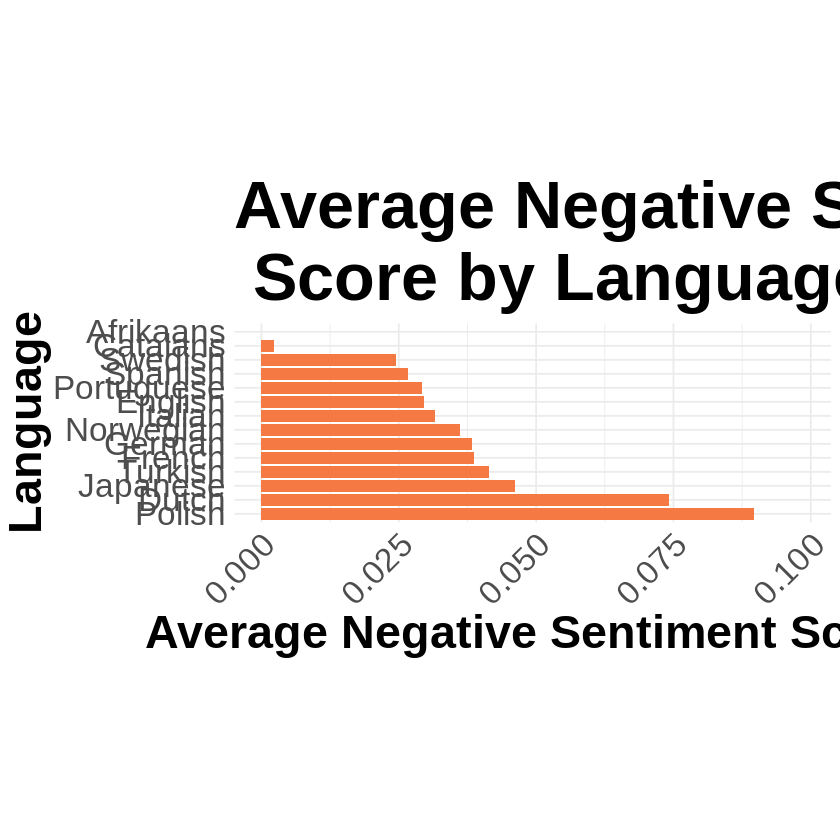

In [ ]:
#NEGATIVE

rude_by_language <- data %>%
  filter(language != 'unknown') %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(average_neg = mean(neg, na.rm = TRUE)) %>%
  arrange(desc(average_neg))


negative <- ggplot(rude_by_language, aes(x = reorder(language, -average_neg), y = average_neg)) +
  geom_bar(stat = "identity", fill = "#f47942") +
  labs(title = "Average Negative Sentiment \n Score by Language",
       x = "Language",
       y = "Average Negative Sentiment Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=20),
        axis.text.y = element_text(size = 20),
        axis.title=element_text(size=28, face='bold'),
        plot.title=element_text(size=40, face='bold')) +
  scale_x_discrete(labels=c('Polish', 'Dutch', 'Japanese', 'Turkish', 'French', 'German',
          'Norwegian', 'Italian', 'English', 'Portuguese', 'Spanish',
           'Swedish', 'Catalans', 'Afrikaans'))  +
  coord_flip() +
  theme(aspect.ratio=1/3) +

   expand_limits(y = max(rude_by_language$average_neg) * 1.1)


negative

ggsave(negative, width=16, height=11, filename='negative.png')

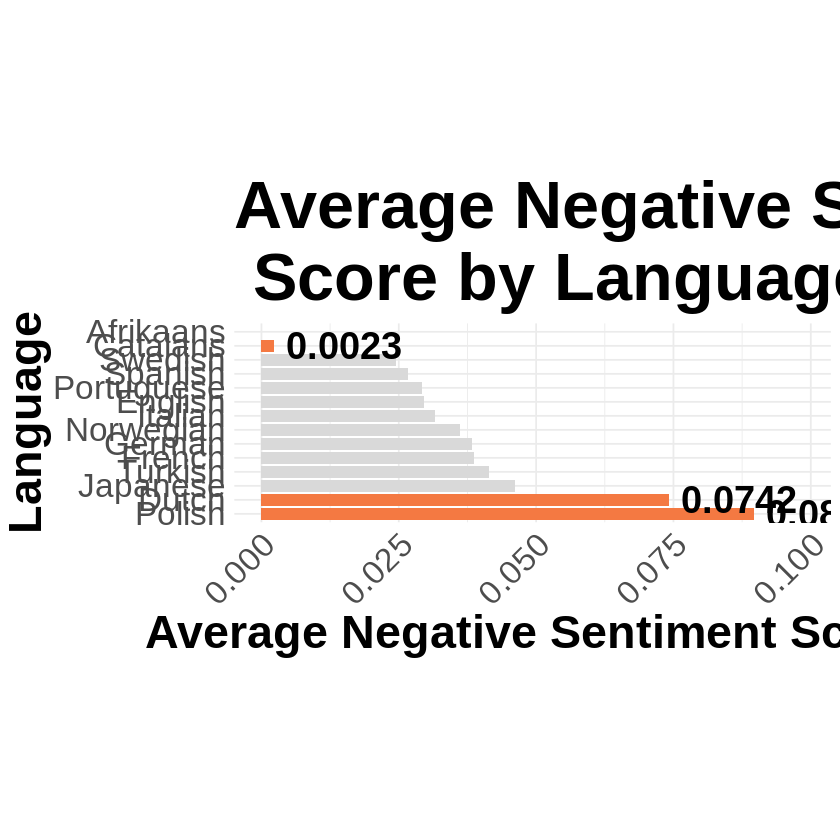

In [ ]:
#NEGATIVE WITH HIGHLIGHTS

rude_by_language <- data %>%
  filter(language != 'unknown') %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(average_neg = mean(neg, na.rm = TRUE)) %>%
  arrange(desc(average_neg))


rude_by_language <- rude_by_language %>%
  mutate(highlight = ifelse(language %in% c("pl", "nl", "ca"), "Highlighted", "Normal"))


negative1 <- ggplot(rude_by_language, aes(x = reorder(language, -average_neg),
                                          y = average_neg,
                                          fill = highlight)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_manual(name = "Highlight",
                    values = c("Highlighted" = "#f47942", "Normal" = "#d9d9d9")) +
  labs(title = "Average Negative Sentiment \n Score by Language",
       x = "Language",
       y = "Average Negative Sentiment Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
        axis.text.y = element_text(size = 20),
        axis.title=element_text(size=28, face='bold'),
        plot.title=element_text(size=40, face='bold')) +
  scale_x_discrete(labels=c('Polish', 'Dutch', 'Japanese', 'Turkish', 'French', 'German',
          'Norwegian', 'Italian', 'English', 'Portuguese', 'Spanish',
           'Swedish', 'Catalans', 'Afrikaans'))  +
  coord_flip() +

    geom_text(data = filter(rude_by_language, highlight == "Highlighted"),
            aes(label = round(average_neg, digits = 4)),
            hjust = -0.1,  size =8, fontface = "bold")  +
  theme(aspect.ratio=1/3) +

   expand_limits(y = max(rude_by_language$average_neg) * 1.1)

negative1
ggsave(negative1, width=16, height=11, filename = 'negative1.png')

In [ ]:
rev(c('Catalans', 'Norwegian', 'Italian', 'Portuguese', 'English',
                            'French', 'Spanish', 'Dutch', 'Polish', 'Turkish', 'Afrikaans',
                            'German', 'Swedish', 'Japanese'))

[1] "Japanese"   "Swedish"    "German"     "Afrikaans"  "Turkish"   
 [6] "Polish"     "Dutch"      "Spanish"    "French"     "English"   
[11] "Portuguese" "Italian"    "Norwegian"  "Catalans"

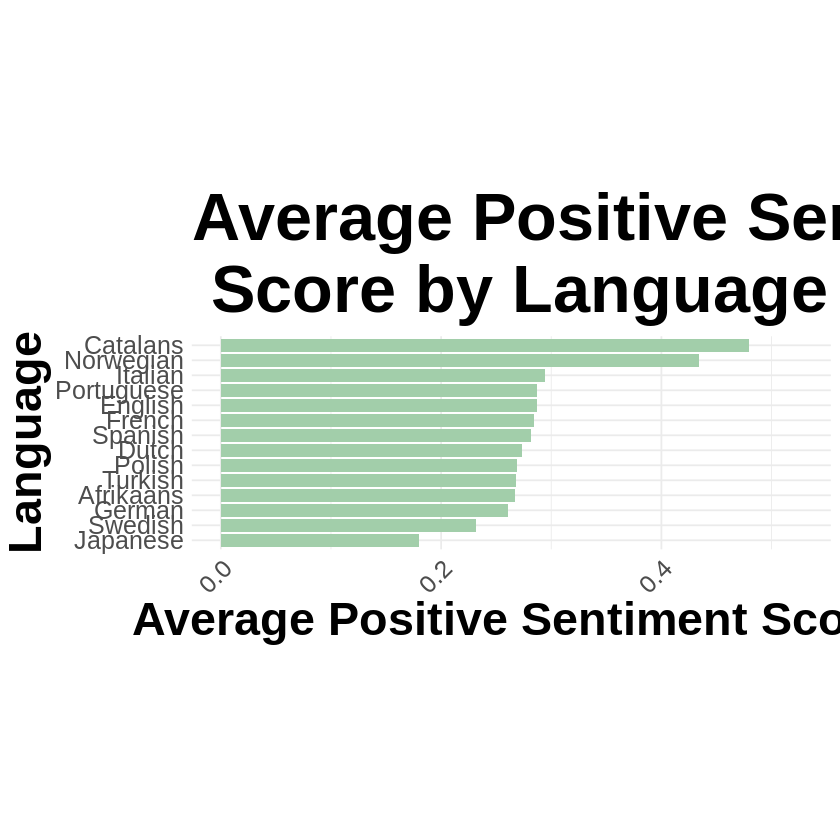

In [ ]:
#POSITIVE

rude_by_language <- data %>%
  filter(language != 'unknown') %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(average_pos = mean(pos, na.rm = TRUE)) %>%
  arrange(desc(average_pos))


positive <-ggplot(rude_by_language, aes(x = reorder(language, average_pos), y = average_pos)) +
  geom_bar(stat = "identity", fill = "#a2ceaa") +
  labs(title = "Average Positive Sentiment \n Score by Language",
       x = "Language",
       y = "Average Positive Sentiment Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
        axis.text.y = element_text(size = 15),
        axis.title=element_text(size=28, face='bold'),
        plot.title=element_text(size=40, face='bold')) +
  scale_x_discrete(labels=c('Japanese', 'Swedish','German','Afrikaans','Turkish','Polish','Dutch',
'Spanish','French','English','Portuguese','Italian','Norwegian','Catalans'))  +

  coord_flip() +
  theme(aspect.ratio=1/3) +

  expand_limits(y = max(rude_by_language$average_pos) * 1.1)

positive

ggsave(positive, width=16, height=11, filename='positive.png')

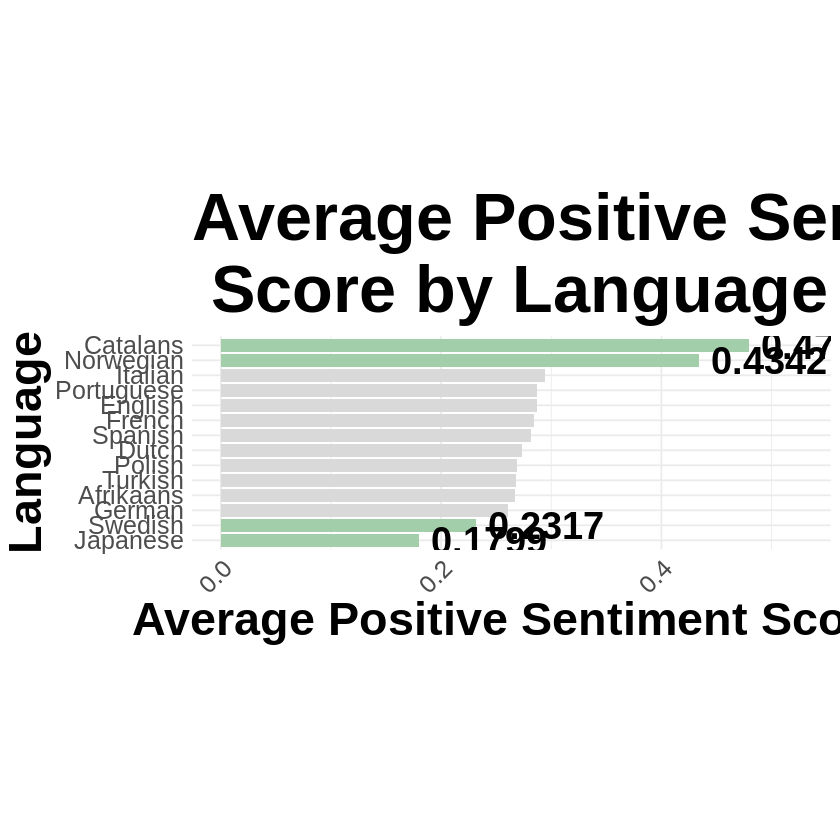

In [ ]:
#POSITIVE WITH HIGHLIGHTS

rude_by_language <- data %>%
  filter(language != 'unknown') %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(average_pos = mean(pos, na.rm = TRUE)) %>%
  arrange(desc(average_pos))


rude_by_language <- rude_by_language %>%
  mutate(highlight = ifelse(language %in% c("ca", "no", "sv", "ja"), "Highlighted", "Normal"))


positive1 <- ggplot(rude_by_language, aes(x = reorder(language, average_pos),
                                          y = average_pos,
                                          fill = highlight)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_manual(name = "Highlight",
                    values = c("Highlighted" = "#a2ceaa", "Normal" = "#d9d9d9")) +
  labs(title = "Average Positive Sentiment \n Score by Language",
       x = "Language",
       y = "Average Positive Sentiment Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
        axis.text.y = element_text(size = 15),
        axis.title=element_text(size=28, face='bold'),
        plot.title=element_text(size=40, face='bold'))  +
    scale_x_discrete(labels=c('Japanese', 'Swedish','German','Afrikaans','Turkish','Polish','Dutch',
'Spanish','French','English','Portuguese','Italian','Norwegian','Catalans'))  +

  coord_flip() +

  geom_text(data = filter(rude_by_language, highlight == "Highlighted"),
            aes(label = round(average_pos, digits = 4)),
            hjust = -0.1,  size =8, fontface = "bold")  +
  theme(aspect.ratio=1/3) +

  expand_limits(y = max(rude_by_language$average_pos) * 1.1)

positive1
ggsave(positive1, width=16, height=11, filename = 'positive1.png')

- netherlands(nl), and Poland(pl) have the rudest reviews.

- Catalonia(ca) and Norway (no) have the nicest reviews
- Netherlands(nl) does not have many positve reviews and had one of the most rudest country for reviews. - Evidence to suggest people in the Netherlands are the most rude in reviews.

Saving 7 x 7 in image


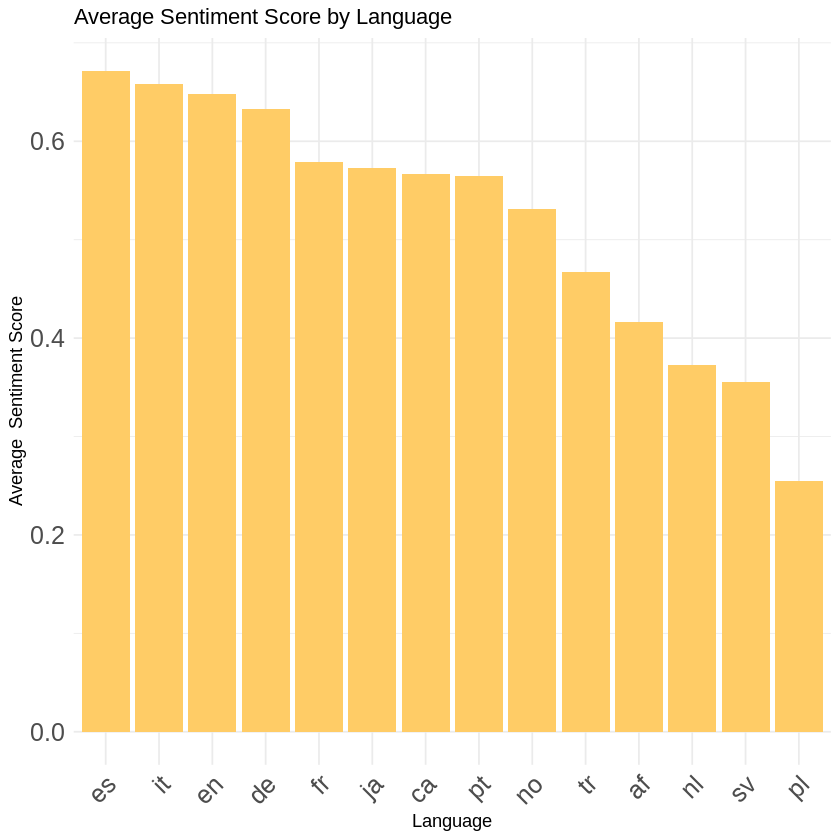

In [ ]:
#COMPOUND

rude_by_language <- data %>%
  filter(language != 'unknown') %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(average_com = mean(compound, na.rm = TRUE)) %>%
  arrange(desc(average_com))


compound <- ggplot(rude_by_language, aes(x = reorder(language, -average_com), y = average_com)) +
  geom_bar(stat = "identity", fill = '#ffcc66') +
  labs(title = "Average Sentiment Score by Language",
       x = "Language",
       y = "Average  Sentiment Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
        axis.text.y = element_text(size = 15))

compound

ggsave(compound, filename='compound.png')

Saving 7 x 7 in image


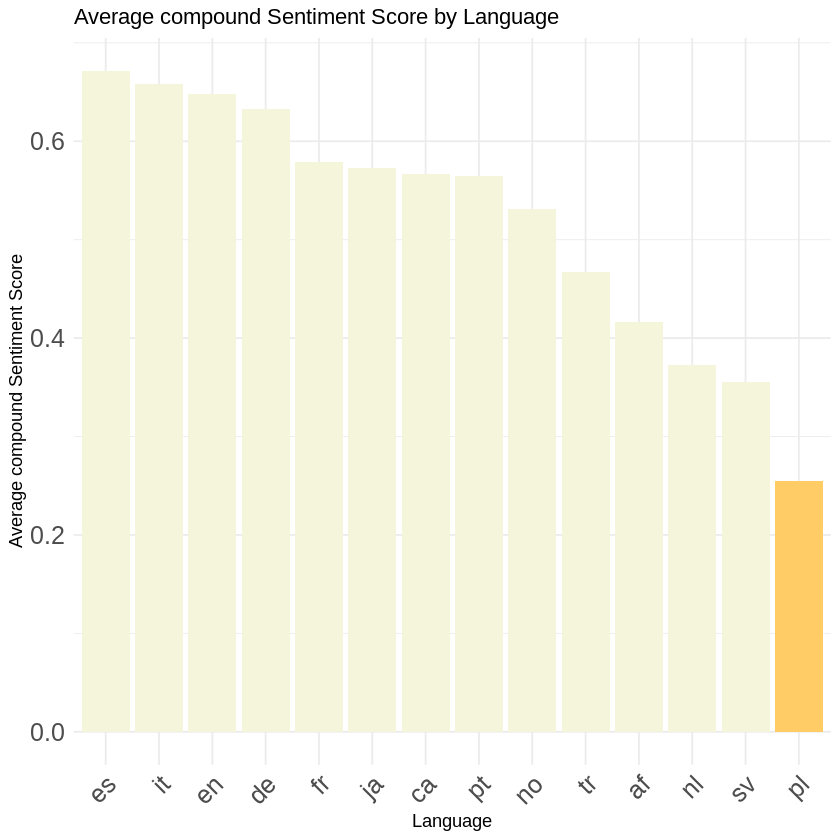

In [ ]:
#COMPOUND WITH HIGHLIGHTS

rude_by_language <- data %>%
  filter(language != 'unknown') %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(average_com = mean(compound, na.rm = TRUE)) %>%
  arrange(desc(average_com))


rude_by_language <- rude_by_language %>%
  mutate(highlight = ifelse(language %in% c("pl"), "Highlighted", "Normal"))


compound1 <- ggplot(rude_by_language, aes(x = reorder(language, -average_com),
                                          y = average_com,
                                          fill = highlight)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  scale_fill_manual(name = "Highlight",
                    values = c("Highlighted" = "#ffcc66", "Normal" = "#f5f5dc")) +
  labs(title = "Average compound Sentiment Score by Language",
       x = "Language",
       y = "Average compound Sentiment Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
        axis.text.y = element_text(size = 15))

compound1
ggsave(compound1, filename = 'compound1.png')

In [ ]:
sentiment_by_language <- data %>%
  group_by(language) %>%
  filter(n() >= 10) %>%  # Keep languages with at least 10 reviews
  summarise(
    average_neg = mean(neg, na.rm = TRUE),
    average_pos = mean(pos, na.rm = TRUE),
    count = n()
  ) %>%
  arrange(desc(average_neg))

print(sentiment_by_language)

# A tibble: 14 × 4
   language average_neg average_pos count
   <chr>          <dbl>       <dbl> <int>
 1 pl           0.0897        0.269    35
 2 nl           0.0742        0.273    32
 3 ja           0.0462        0.180   138
 4 tr           0.0414        0.268    93
 5 fr           0.0386        0.284   452
 6 de           0.0383        0.261   698
 7 no           0.0361        0.434    12
 8 it           0.0316        0.295   594
 9 en           0.0295        0.287  2409
10 pt           0.0292        0.288    75
11 es           0.0266        0.282   507
12 sv           0.0244        0.232    29
13 ca           0.00233       0.480    15
14 af           0             0.267    10


nl and pl have a high negative and a low positive which suggests that these countries are the most rude, (netherlands and poland)

In [ ]:
sentiment_by_language <- data %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(
    average_neg = mean(neg, na.rm = TRUE),
    average_pos = mean(pos, na.rm = TRUE),
    count = n()
  ) %>%
  mutate(
    rudeness_metric = (average_neg * 10) - average_pos,
    is_rude = rudeness_metric > 0.3
  ) %>%
  arrange(desc(rudeness_metric))

print(sentiment_by_language)

# A tibble: 14 × 6
   language average_neg average_pos count rudeness_metric is_rude
   <chr>          <dbl>       <dbl> <int>           <dbl> <lgl>  
 1 pl           0.0897        0.269    35         0.629   TRUE   
 2 nl           0.0742        0.273    32         0.469   TRUE   
 3 ja           0.0462        0.180   138         0.282   FALSE  
 4 tr           0.0414        0.268    93         0.145   FALSE  
 5 de           0.0383        0.261   698         0.122   FALSE  
 6 fr           0.0386        0.284   452         0.102   FALSE  
 7 it           0.0316        0.295   594         0.0216  FALSE  
 8 sv           0.0244        0.232    29         0.0128  FALSE  
 9 en           0.0295        0.287  2409         0.00808 FALSE  
10 pt           0.0292        0.288    75         0.00476 FALSE  
11 es           0.0266        0.282   507        -0.0158  FALSE  
12 no           0.0361        0.434    12        -0.0733  FALSE  
13 af           0             0.267    10        -0.267  

- Metric: multiply the average_neg column by 10, subtract the average_pos from this amount. If the result is higher than 0.3 then that country is considered rude. If it their result is lower than 0 then we can consider that the country tends to write more positive reviews.

- nl, pl are rude (somalia, netherlands and poland)

In [ ]:
#Do the same for positive reviews:

sentiment_by_language <- data %>%
  group_by(language) %>%
  filter(n() >= 10) %>%
  summarise(
    average_neg = mean(neg, na.rm = TRUE),
    average_pos = mean(pos, na.rm = TRUE),
    count = n()
  ) %>%
  mutate(
    politeness_metric =  average_pos - (average_neg * 10) ,
    is_polite = politeness_metric > 0.3
  ) %>%
  arrange(desc(politeness_metric))

print(sentiment_by_language)

#metric = positive - (negative * 10)
        # --> if the result is greater than 0.3 then that country is polite

# A tibble: 14 × 6
   language average_neg average_pos count politeness_metric is_polite
   <chr>          <dbl>       <dbl> <int>             <dbl> <lgl>    
 1 ca           0.00233       0.480    15           0.456   TRUE     
 2 af           0             0.267    10           0.267   FALSE    
 3 no           0.0361        0.434    12           0.0733  FALSE    
 4 es           0.0266        0.282   507           0.0158  FALSE    
 5 pt           0.0292        0.288    75          -0.00476 FALSE    
 6 en           0.0295        0.287  2409          -0.00808 FALSE    
 7 sv           0.0244        0.232    29          -0.0128  FALSE    
 8 it           0.0316        0.295   594          -0.0216  FALSE    
 9 fr           0.0386        0.284   452          -0.102   FALSE    
10 de           0.0383        0.261   698          -0.122   FALSE    
11 tr           0.0414        0.268    93          -0.145   FALSE    
12 ja           0.0462        0.180   138          -0.282   FALSE    
1

- Catalans (ca) considered polite


In [ ]:
data %>%
  filter(language == 'nl')

X,Unnamed..0,title,set_id,date,content,rating,num_pieces,manufacturer_recommended.age,release_date,date_first_available,translated_content,review,compound,neg,neu,pos,language
<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
603,1180,"5.0 out of 5 starsPerfect Gift, Well Received",21335,Reviewed in Australia on 26 May 2023,"do children, even older children ever get over pooh bear and friends? no",5,2065,‎18 years and up,‎1 September 2022,6 November 2022,"do children, even older children ever get over pooh bear and friends? no","do children, even older children ever get over pooh bear and friends? no",0.2263,0.135,0.675,0.190,nl
1153,2277,Beschadigd,42123,Reviewed in the Netherlands on 16 September 2023,"ik ontving een beschadigde doos, duidelijk al eens geopend en met plakband dicht gemaakt. super slecht dat dit verkocht wordt als nieuw product. meteen retour gestuurd!",1,830,‎10 years and up,‎1 February 2021,26 December 2020,"I received a damaged box, clearly opened and taped shut. Super bad that this is sold as a new product. Immediately returned!","I received a damaged box, clearly opened and taped shut. Super bad that this is sold as a new product. Immediately returned!",0.1260,0.226,0.530,0.244,nl
1154,2279,Beschadigd afgeleverd,75331,Reviewed in the Netherlands on 21 December 2021,beschadigd afgeleverd zeer spijtigtot de bouwstenen toe,1,6187,‎18 years and up,‎1 January 2023,2 January 2023,"delivered damaged, very unfortunate, down to the building blocks","delivered damaged, very unfortunate, down to the building blocks",-0.7960,0.574,0.426,0.000,nl
1962,3885,Favoriete set,21335,Reviewed in the Netherlands on 30 October 2023,ik als ben groot fan van deze set.jammer dat er niet meer van zijnis leuk om te bouwen en niet te duur voor de prijs.,5,2065,‎18 years and up,‎1 September 2022,6 November 2022,I am a big fan of this set. Too bad there are not more of them. It is fun to build and not too expensive for the price.,I am a big fan of this set. Too bad there are not more of them. It is fun to build and not too expensive for the price.,0.2732,0.109,0.717,0.174,nl
2626,5302,Handige plaat,11024,Reviewed in the Netherlands on 17 June 2024,deze plaat al vaker besteld voor mijn zoon.goedkope prijs en snel verzonden.,5,1,‎4 years and up,‎1 March 2022,1 March 2022,I have ordered this plate several times for my son. Good price and fast shipping.,I have ordered this plate several times for my son. Good price and fast shipping.,0.4404,0.000,0.818,0.182,nl
2645,5355,Heel mooi!!!,42083,Reviewed in the Netherlands on 15 August 2020,zeer mooie lego doos. supersnelle levering. helemaal goed!,5,3599,‎16 years and up,‎26 July 2018,26 June 2018,very nice lego box. super fast delivery. all good!,very nice lego box. super fast delivery. all good!,0.8803,0.000,0.371,0.629,nl
2843,5779,It’s Star Wars,6332980,Reviewed in the United States on 10 February 2022,grandson went apes over it,5,471,‎17 years and up,‎26 April 2021,25 March 2021,grandson went apes over it,grandson went apes over it,0.0000,0.000,1.000,0.000,nl
3008,6126,"LET OP, NIET KOPEN",75352,Reviewed in the Netherlands on 22 July 2024,"absoluut niet kopen, dit is een nep product.ik heb deze gekocht, en kreeg reclame van het buitenland, gemengt met playmobile en random stukken lego die niks hiermee te maken hebben",1,807,‎18 years and up,‎1 May 2023,1 May 2023,"absolutely do not buy, this is a fake product. I bought this, and got advertising from abroad, mixed with playmobile and random pieces of lego that have nothing to do with it","absolutely do not buy, this is a fake product. I bought this, and got advertising from abroad, mixed with playmobile and random pieces of lego that have nothing to do with it",-0.4767,0.097,0.903,0.000,nl
3276,6685,"Lego product prima, kleine beschadiging doos bij transport.",75352,Reviewed in Belgium on 26 July 2024,"lego product prima, kleine beschadiging doos bij transport. vandaar min 1 ster",4

In [ ]:
data %>%
  filter(neg > 0.3)

X,Unnamed..0,title,set_id,date,content,rating,num_pieces,manufacturer_recommended.age,release_date,date_first_available,translated_content,review,compound,neg,neu,pos,language
<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,15,.,75331,Reviewed in Italy on 7 July 2024,lego non servono commenti,5,6187,‎18 years and up,‎1 January 2023,2 January 2023,lego no comments needed,lego no comments needed,-0.2960,0.423,0.577,0.000,it
8,20,.,43107,Reviewed in Germany on 27 August 2021,der preis stimmt aber für ein geschenk nicht zu verschenken ... set ist beschädigt.,3,73,‎7 years and up,‎1 March 2021,1 September 2020,The price is right but it's not worth giving away as a gift... the set is damaged.,The price is right but it's not worth giving away as a gift... the set is damaged.,-0.8128,0.393,0.607,0.000,de
13,35,1.0 out of 5 starsAll the crap pieces,10698,Reviewed in Australia on 5 February 2023,this contains all the very tiny crap pieces of lego you don’t want or need. useless crappy lego in a cool box. i would not recommend you can’t build anything out of this crap,1,790,‎4 months and up,‎1 January 2015,26 November 2014,this contains all the very tiny crap pieces of lego you don’t want or need. useless crappy lego in a cool box. i would not recommend you can’t build anything out of this crap,this contains all the very tiny crap pieces of lego you don’t want or need. useless crappy lego in a cool box. i would not recommend you can’t build anything out of this crap,-0.8926,0.333,0.583,0.084,en
43,101,3 yaşındaki kızımın ilgisini çekti,11017,Reviewed in Turkey on 10 August 2024,erken olduğunu düşünüyordum fakat çok ilgilenmedi,5,140,‎4 years and up,‎1 March 2022,28 February 2022,I thought it was early but he didn't care much.,I thought it was early but he didn't care much.,-0.5334,0.301,0.699,0.000,tr
44,102,3.0 out of 5 starsCollectors beware,75367,Reviewed in Australia on 25 July 2024,"as a collector, the box is damaged which is very disappointing.",3,5374,‎18 years and up,‎1 October 2023,1 January 2024,"as a collector, the box is damaged which is very disappointing.","as a collector, the box is damaged which is very disappointing.",-0.7501,0.444,0.556,0.000,en
46,105,3.0 out of 5 starsDamage on the box,10255,Reviewed in Australia on 1 April 2021,great price but got damage on the box. damage is not caused by delivery.,3,4002,‎16 years and up,‎12 June 2021,30 December 2016,great price but got damage on the box. damage is not caused by delivery.,great price but got damage on the box. damage is not caused by delivery.,-0.7935,0.388,0.497,0.115,en
233,481,5.0 out of 5 starsEfficiency,75338,Reviewed in Australia on 26 November 2023,"quick and well packaged, no damage, no problems,no worries. thank you.",5,679,‎9 years and up,‎1 August 2022,31 July 2022,"quick and well packaged, no damage, no problems,no worries. thank you.","quick and well packaged, no damage, no problems,no worries. thank you.",-0.7003,0.520,0.250,0.230,en
256,522,5.0 out of 5 starsFabulous,10698,Reviewed in Australia on 18 January 2020,what’s not to like about lego!,5,790,‎4 months and up,‎1 January 2015,26 November 2014,what’s not to like about lego!,what’s not to like about lego!,-0.3404,0.325,0.675,0.000,en
404,810,5.0 out of 5 starsGreat set,31088,Reviewed in Australia on 29 July 2022,what’s not to like? great price - my son loves lego!,5,230,‎7 years and up,‎1 January 2019,1 February 2019,what’s not to like? great price - my son loves lego!,what’s not to like? great price - my son loves lego!,-0.2491,0.347,0.427,0.226,en


In [ ]:
#Find worst rated sets.
data %>%
  group_by(set_id) %>%
  summarise(avg_neg = mean(neg, na.rm = TRUE)) %>%
  arrange(desc(avg_neg))


set_id,avg_neg
<int>,<dbl>
75367,0.14644444
43101,0.09285714
43179,0.09059091
43105,0.07950000
43102,0.06700000
75357,0.06596429
75352,0.06363218
75338,0.06290805
75380,0.06195714
